# Powiaty

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
powiaty = pd.read_excel('Powiaty.xls')

dokonujemy normalizacji metodą 

In [ ]:
powiaty['z1'] = (powiaty.X1_s-np.min(powiaty.X1_s)) / (np.max(powiaty.X1_s) - np.min(powiaty.X1_s))
powiaty['z1'].describe()

count    35.000000
mean      0.664574
std       0.174233
min       0.000000
25%       0.602556
50%       0.671521
75%       0.729207
max       1.000000
Name: z1, dtype: float64

In [ ]:
powiaty['z2'] = (powiaty.X2_s-np.min(powiaty.X2_s)) / (np.max(powiaty.X2_s) - np.min(powiaty.X2_s))
powiaty['z3'] = (np.max(powiaty.X3_d) - powiaty.X3_d) / (np.max(powiaty.X3_d) - np.min(powiaty.X3_d))
powiaty['z4'] = (np.max(powiaty.X4_d) - powiaty.X4_d) / (np.max(powiaty.X4_d) - np.min(powiaty.X4_d))
powiaty['z5'] = (np.max(powiaty.X5_d) - powiaty.X5_d) / (np.max(powiaty.X5_d) - np.min(powiaty.X5_d))
powiaty['z6'] = (np.max(powiaty.X6_d) - powiaty.X6_d) / (np.max(powiaty.X6_d) - np.min(powiaty.X6_d))
powiaty.loc[:,'z1':'z6'].describe()

,z1,z2,z3,z4,z5,z6
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.664574,0.409495,0.467755,0.465635,0.494289,0.809949
std,0.174233,0.212612,0.230894,0.234979,0.232728,0.203337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602556,0.268325,0.271429,0.271943,0.332606,0.777517
50%,0.671521,0.380412,0.461905,0.449770,0.519235,0.860363
75%,0.729207,0.512172,0.650000,0.621935,0.654467,0.945407
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


wyznaczanie miernik syntetyczny metodą bezwzorcową


In [ ]:
powiaty['miernik'] = powiaty.loc[:,'z1':'z6'].mean(axis=1)
powiaty.sort_values(by='miernik', ascending = False, inplace=True)
powiaty[["Powiaty", "miernik"]]

,Powiaty,miernik
34,Poznań,0.867575
20,poznański,0.796835
33,Leszno,0.691035
31,Kalisz,0.643147
23,szamotulski,0.629432
28,wolsztyński,0.625491
12,leszczyński,0.625481
17,ostrzeszowski,0.618537
10,kościański,0.612419
24,średzki,0.601480


wyznaczamy wskaźnik metodą wzorcową zakładając że, że wartości maksymalne naszych zmiennych znormalizowanych są wzorcem

In [ ]:
mier_wzorcowy = powiaty.loc[:,'z1':'z6']-powiaty.loc[:,'z1':'z6'].mean(axis=0)
powiaty['miernik_wz'] = np.sqrt(np.mean(mier_wzorcowy))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


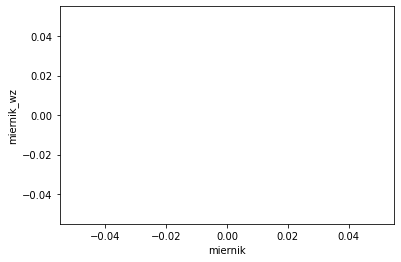

In [ ]:
powiaty.plot.scatter(x = "miernik", y = "miernik_wz")

# Poznan rent

wczytujemy dane dotyczące nieruchomosci na wynajem w Poznaniu. Celem naszej analizy jest zbudowanie renkingu wybranych dzielnic Poznania na podstaweir charakterystyk nieruchomości, które się tam znajdują. Ranking budujemy z punktu widzenia studenta/tki.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
rent = pd.read_excel("rent-poznan.xlsx")
rent.head(n=2)

,id,date_activ,date_modif,date_expire,individual,price,flat_area,flat_rooms,flat_floor_no,flat_build_year,flat_furnished,flat_rent,flat_deposit,flat_price_include_rent,flat_for_students,flat_heating,flat_status,flat_windows,building_floor_num,building_type,building_material,ad_title,ad_seller_id,ad_promo,flat_balcony,flat_utility_room,flat_garage,flat_basement,flat_garden,flat_tarrace,flat_lift,flat_two_level,flat_kitchen_sep,flat_air_cond,flat_nonsmokers,flat_washmachine,flat_dishwasher,flat_fridge,flat_cooker,flat_oven,flat_tv_device,flat_internet,flat_television,flat_phone,flat_anti_blinds,flat_anti_doors_windows,flat_intercom,flat_monitoring,flat_alarm_sys,flat_closed_area,quarter
0,19576742,2015-03-24,2020-09-05,2020-10-05,True,1400,30.0,1,2.0,0,True,360,1400.0,False,True,0.0,0.0,0.0,0,0.0,NaN,"Ładna, kawalerka. BEZPOŚREDNIO.",592916,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,Rataje
1,20292499,2013-07-19,2020-08-30,2020-09-09,True,4600,160.0,4,4.0,1900,True,0,0.0,False,True,1.0,0.0,0.0,5,1.0,0.0,Apartment in very center of Poznan - direct of...,226529,False,False,True,False,False,False,False,False,False,True,False,False,True,True,True,True,True,False,True,True,True,False,False,True,True,True,False,Stare Miasto


zrobimy następujące ograniczenia zbioru danych:

-cena ma być z przedziału 800-2000

-flat_are ma być z przedziału 20-70

-flat_rooms ma być 1,2,3 lub 4

-na koniec sprawdzimy dzielnice bo ograniczyzmy je tylko do tych, których jest najwięcej

In [ ]:
rent_analiza = rent.query('price>=800 & price<=2000 & flat_area>=20 & flat_area <=70 & flat_rooms>=1 & flat_rooms<=4')
rent_analiza.shape

(12100, 51)

chcemy sprawdzić ile ogłoszeń dotyczy poszczególnych dzielnic poznania

In [ ]:
pd.set_option('max_rows',100)
rent_analiza.value_counts('quarter')
lista_dzielnic = ['Grunwald', 'Rataje', 'Centrum', 'Jeżyce', 'Piątkowo', 'Winogrady', 'Wilda', 'Łazarz', 'Naramowice', 'Winiary']

In [ ]:
rent_analiza2 = rent_analiza.query('quarter==@lista_dzielnic')
rent_analiza2.head(1)

,id,date_activ,date_modif,date_expire,individual,price,flat_area,flat_rooms,flat_floor_no,flat_build_year,flat_furnished,flat_rent,flat_deposit,flat_price_include_rent,flat_for_students,flat_heating,flat_status,flat_windows,building_floor_num,building_type,building_material,ad_title,ad_seller_id,ad_promo,flat_balcony,flat_utility_room,flat_garage,flat_basement,flat_garden,flat_tarrace,flat_lift,flat_two_level,flat_kitchen_sep,flat_air_cond,flat_nonsmokers,flat_washmachine,flat_dishwasher,flat_fridge,flat_cooker,flat_oven,flat_tv_device,flat_internet,flat_television,flat_phone,flat_anti_blinds,flat_anti_doors_windows,flat_intercom,flat_monitoring,flat_alarm_sys,flat_closed_area,quarter
0,19576742,2015-03-24,2020-09-05,2020-10-05,True,1400,30.0,1,2.0,0,True,360,1400.0,False,True,0.0,0.0,0.0,0,0.0,NaN,"Ładna, kawalerka. BEZPOŚREDNIO.",592916,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,Rataje


wybieramy charakterystyki wg których chcielibyśmy przeprowadzić porządkowanie.

-    price -- destymulanta
-    flat_area -- stymulanta
-    flat_rooms -- stymulanta
-    individual-- stymulanta
-    flat_furnished-- stymulanta
-    flat_deposit-- destymulanta
-    flat_for_students-- stymulanta
-    flat_balcony-- stymulanta

tworzymy zbiór danych na potrzeby porządkowania liniowego

In [ ]:
##dane_porządkowanie = rent_analiza2.groupby('quarter').mean()[['price', 'flat_area']]

lista_zmiennych = ['price', 'flat_area', 'flat_rooms','individual','flat_furnished','flat_deposit','flat_for_students','flat_balcony']
dane_porządkowanie = rent_analiza2.groupby('quarter')[lista_zmiennych].mean().reset_index()
dane_porządkowanie

,quarter,price,flat_area,flat_rooms,individual,flat_furnished,flat_deposit,flat_for_students,flat_balcony
0,Centrum,1529.770606,38.768203,1.562066,0.155909,0.465740,941.001986,0.329692,0.378352
1,Grunwald,1491.070532,42.168631,1.787209,0.271369,0.490735,1090.710102,0.248655,0.517633
2,Jeżyce,1496.170854,39.767045,1.622111,0.291457,0.501508,1119.617085,0.294472,0.467337
3,Naramowice,1530.036036,46.107815,1.995495,0.364865,0.531532,1367.081081,0.263514,0.686937
4,Piątkowo,1524.592284,46.905746,1.981230,0.335766,0.482795,1163.450469,0.289885,0.732013
5,Rataje,1521.517341,44.125029,2.001927,0.330443,0.558767,1182.788054,0.350674,0.622351
6,Wilda,1519.372788,40.210830,1.655973,0.285398,0.453540,953.551991,0.275442,0.413717
7,Winiary,1555.577586,46.462069,2.189655,0.301724,0.620690,1547.836207,0.474138,0.681034
8,Winogrady,1496.626596,42.081596,1.925532,0.347872,0.587234,1190.628723,0.325532,0.624468
9,Łazarz,1453.552413,39.737920,1.605657,0.297837,0.470882,1077.940100,0.299501,0.331115


In [ ]:
z1 = (max(dane_porządkowanie.price)-dane_porządkowanie.price)/(max(dane_porządkowanie.price)-min(dane_porządkowanie.price))
z2 = (dane_porządkowanie.flat_area - min(dane_porządkowanie.flat_area))/(max(dane_porządkowanie.flat_area)-min(dane_porządkowanie.flat_area))
z3 = (dane_porządkowanie.flat_rooms - min(dane_porządkowanie.flat_rooms))/(max(dane_porządkowanie.flat_rooms)-min(dane_porządkowanie.flat_rooms))
z4 = (dane_porządkowanie.individual - min(dane_porządkowanie.individual))/(max(dane_porządkowanie.individual)-min(dane_porządkowanie.individual))
z5 = (dane_porządkowanie.flat_furnished - min(dane_porządkowanie.flat_furnished))/(max(dane_porządkowanie.flat_furnished)-min(dane_porządkowanie.flat_furnished))
z6 = (max(dane_porządkowanie.flat_deposit)-dane_porządkowanie.flat_deposit)/(max(dane_porządkowanie.flat_deposit)-min(dane_porządkowanie.flat_deposit))
z8 = (dane_porządkowanie.flat_balcony - min(dane_porządkowanie.flat_balcony))/(max(dane_porządkowanie.flat_balcony)-min(dane_porządkowanie.flat_balcony))
z7 = (dane_porządkowanie.flat_for_students - min(dane_porządkowanie.flat_for_students))/(max(dane_porządkowanie.flat_for_students)-min(dane_porządkowanie.flat_for_students))

In [ ]:
dest = dane_porządkowanie[['price', 'flat_deposit']].apply(lambda x: (max(x) -x)/(max(x)-min(x)))

stym = dane_porządkowanie[['flat_area', 'flat_rooms','individual','flat_furnished','flat_for_students','flat_balcony']].apply(lambda x: (x-min(x))/(max(x)-min(x)))

dane_porz = pd.concat([dane_porządkowanie['quarter'],stym, dest], axis = 1)
dane_porz.head(2)

,quarter,flat_area,flat_rooms,individual,flat_furnished,flat_for_students,flat_balcony,price,flat_deposit
0,Centrum,0.000000,0.000000,0.000000,0.072988,0.359393,0.117827,0.252947,1.000000
1,Grunwald,0.417869,0.358742,0.552557,0.222527,0.000000,0.465251,0.632266,0.753297


In [ ]:
dane_porz['miernik'] = dane_porz.loc[:, 'flat_area':'flat_deposit'].mean(axis=1)
dane_porz.sort_values('miernik', ascending=False, inplace = True)
dane_porz

,quarter,flat_area,flat_rooms,individual,flat_furnished,flat_for_students,flat_balcony,price,flat_deposit,miernik
7,Winiary,0.945478,1.000000,0.697828,1.000000,1.000000,0.872840,0.000000,0.000000,0.689518
8,Winogrady,0.407174,0.579147,0.918679,0.799847,0.340943,0.731741,0.577808,0.588641,0.617997
5,Rataje,0.658285,0.700874,0.835268,0.629537,0.452448,0.726459,0.333842,0.601562,0.617284
4,Piątkowo,1.000000,0.667896,0.860744,0.175021,0.182853,1.000000,0.303703,0.633428,0.602956
3,Naramowice,0.901945,0.690626,1.000000,0.466598,0.065896,0.887563,0.250346,0.297866,0.570105
1,Grunwald,0.417869,0.358742,0.552557,0.222527,0.000000,0.465251,0.632266,0.753297,0.425314
2,Jeżyce,0.122745,0.095676,0.648694,0.286974,0.203196,0.339792,0.582275,0.705661,0.373127
9,Łazarz,0.119166,0.069459,0.679225,0.103751,0.225497,0.000000,1.000000,0.774340,0.371430
6,Wilda,0.177280,0.149633,0.619697,0.000000,0.118800,0.206043,0.354861,0.979319,0.325704
0,Centrum,0.000000,0.000000,0.000000,0.072988,0.359393,0.117827,0.252947,1.000000,0.225395


# Metoda Topsis
Porządkujemy metodą Topsis

In [ ]:
dane_porządkowanie

,quarter,price,flat_area,flat_rooms,individual,flat_furnished,flat_deposit,flat_for_students,flat_balcony
0,Centrum,1529.770606,38.768203,1.562066,0.155909,0.465740,941.001986,0.329692,0.378352
1,Grunwald,1491.070532,42.168631,1.787209,0.271369,0.490735,1090.710102,0.248655,0.517633
2,Jeżyce,1496.170854,39.767045,1.622111,0.291457,0.501508,1119.617085,0.294472,0.467337
3,Naramowice,1530.036036,46.107815,1.995495,0.364865,0.531532,1367.081081,0.263514,0.686937
4,Piątkowo,1524.592284,46.905746,1.981230,0.335766,0.482795,1163.450469,0.289885,0.732013
5,Rataje,1521.517341,44.125029,2.001927,0.330443,0.558767,1182.788054,0.350674,0.622351
6,Wilda,1519.372788,40.210830,1.655973,0.285398,0.453540,953.551991,0.275442,0.413717
7,Winiary,1555.577586,46.462069,2.189655,0.301724,0.620690,1547.836207,0.474138,0.681034
8,Winogrady,1496.626596,42.081596,1.925532,0.347872,0.587234,1190.628723,0.325532,0.624468
9,Łazarz,1453.552413,39.737920,1.605657,0.297837,0.470882,1077.940100,0.299501,0.331115
